## Russell 3000 Dimensionality Reduction 

The data has been downloaded before.  We are using <font color="red">Russell 3000</font> constituents.  For this experiment, we do not care how the constituents of the index changes.  Our goal is to find out change in dimensionality using PCA, MDS and Isomap.  The data set will give us a time series of dimension based on <font color="blue">PCA, MDS and Isomap</font>

# Experiment 1:

This experiment is based on running
<ol>
    <li>PCA
    <li>MDS
    <li>Isomap
</ol>
We calculate the dimension by only considering values greater than a threshold.  For example, if there are 5 values x1=100, x2=50, x3=5, x4=4, x5=1 then x5 is less than 1% of the sum of the values.  The dimensionality is the length of the array with values greater than the specified threshold value.

In [1]:
import expt_theta
import calc_dim
import utils

expt_theta.run_expt()

#### Plotting based on 1% threshold value

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Plot of squared SVD values

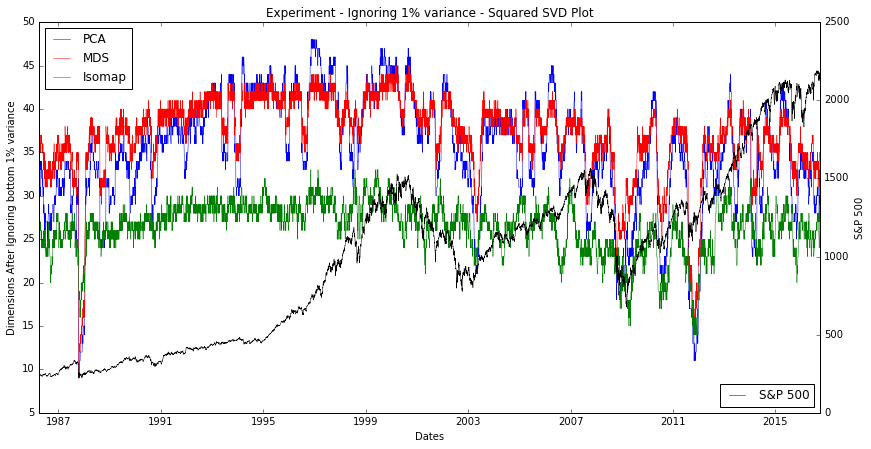

In [6]:
r'C:\phd\log\log.txt'
df = pd.read_csv('expt_theta_60.csv')

ts = pd.to_datetime(df['Dates'], format='%m/%d/%Y')

fig, ax1 = plt.subplots(figsize=(14,7))
ax2 = ax1.twinx()
l1 = ax1.plot(ts, df['PCA_EIG_DIMS'], 'b', label='PCA', linewidth=0.5)
l2 = ax1.plot(ts, df['MDS_EIG_DIMS'], 'r', label='MDS', linewidth=0.5)
l3 = ax1.plot(ts, df['ISO_EIG_DIMS'], 'g', label='Isomap', linewidth=0.5)
ax1.legend(loc='upper left')

l4 = ax2.plot(ts, df['SP500'], 'k', label='S&P 500', linewidth=0.5)
ax2.legend(loc='lower right')

ax1.set_xlabel('Dates')
ax1.set_ylabel('Dimensions After Ignoring bottom 1% variance')
ax2.set_ylabel('S&P 500')

title = 'Experiment - Ignoring 1% variance - Squared SVD Plot'
plt.title(title)
# plt.legend(loc='lower right')

# plt.figlegend((l1, l2, l3, l4), ('PCA', 'MDS', 'Isomap', 'S&P 500'), 'upper left')

# plt.savefig('all3.pdf')
plt.show()

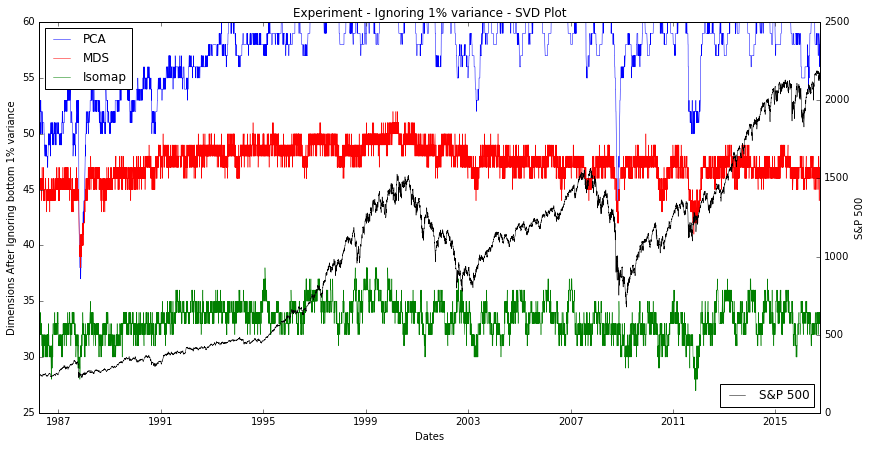

In [7]:
df = pd.read_csv('expt_theta_60.csv')

ts = pd.to_datetime(df['Dates'], format='%m/%d/%Y')

fig, ax1 = plt.subplots(figsize=(14,7))
ax2 = ax1.twinx()
l1 = ax1.plot(ts, df['PCA_SVD_DIMS'], 'b', label='PCA', linewidth=0.5)
l2 = ax1.plot(ts, df['MDS_SVD_DIMS'], 'r', label='MDS', linewidth=0.5)
l3 = ax1.plot(ts, df['ISO_SVD_DIMS'], 'g', label='Isomap', linewidth=0.5)
ax1.legend(loc='upper left')

l4 = ax2.plot(ts, df['SP500'], 'k', label='S&P 500', linewidth=0.5)
ax2.legend(loc='lower right')

ax1.set_xlabel('Dates')
ax1.set_ylabel('Dimensions After Ignoring bottom 1% variance')
ax2.set_ylabel('S&P 500')

title = 'Experiment - Ignoring 1% variance - SVD Plot'
plt.title(title)
# plt.legend(loc='lower right')

# plt.figlegend((l1, l2, l3, l4), ('PCA', 'MDS', 'Isomap', 'S&P 500'), 'upper left')

# plt.savefig('all3.pdf')
plt.show()

## Load the data from russell3000.csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logging
import os.path

from sklearn import manifold
from numpy.linalg import svd
from scipy.spatial.distance import pdist
from numpy.linalg import norm

%matplotlib inline

# Plotting based on previously generated results

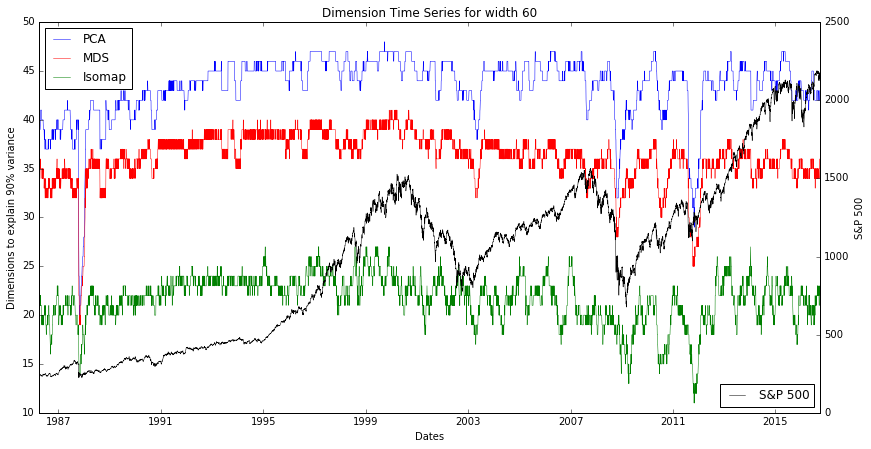

In [72]:
df = pd.read_csv('60.csv')

ts = pd.to_datetime(df['Dates'], format='%m/%d/%Y')

fig, ax1 = plt.subplots(figsize=(14,7))
ax2 = ax1.twinx()
l1 = ax1.plot(ts, df['PCA_EIG_DIMS'], 'b', label='PCA', linewidth=0.5)
l2 = ax1.plot(ts, df['MDS_EIG_DIMS'], 'r', label='MDS', linewidth=0.5)
l3 = ax1.plot(ts, df['ISO_EIG_DIMS'], 'g', label='Isomap', linewidth=0.5)
ax1.legend(loc='upper left')

l4 = ax2.plot(ts, df['SP500'], 'k', label='S&P 500', linewidth=0.5)
ax2.legend(loc='lower right')

ax1.set_xlabel('Dates')
ax1.set_ylabel('Dimensions to explain 90% variance')
ax2.set_ylabel('S&P 500')

title = 'Dimension Time Series for width 60'
plt.title(title)
# plt.legend(loc='lower right')

# plt.figlegend((l1, l2, l3, l4), ('PCA', 'MDS', 'Isomap', 'S&P 500'), 'upper left')

# plt.savefig('all3.pdf')
plt.show()

In [7]:
S = [100, 50, 10, 5, .6, .5, .1]
tot = sum(S)
s_exp = [(i / tot) for i in sorted(S, reverse=True)]
# cum_s_exp = np.cumsum(s_exp)  
# cum_s_exp
print(s_exp)
s_1pct = [i for i in s_exp if i >= 0.01]
print(s_1pct)
print(len(s_1pct))

[0.601684717208183, 0.3008423586040915, 0.060168471720818295, 0.030084235860409148, 0.0036101083032490976, 0.0030084235860409147, 0.0006016847172081829]
[0.601684717208183, 0.3008423586040915, 0.060168471720818295, 0.030084235860409148]
4


In [6]:
def get_returns_df():
    """Load the data and calculate log return.  Remove the 
    first row because it will always be NaN."""
    df = pd.read_csv('russell3000.csv')
    df.set_index(df['Dates'], inplace=True)
    df.drop('Dates', axis=1, inplace=True)
    df_ret = np.log(df / df.shift())
    df_ret.drop(['1/2/1986'], inplace=True)
    return df_ret

def get_svd_dimension(S, threshold=0.9):
    tot = sum(S)
    s_exp = [(i / tot) for i in sorted(S, reverse=True)]  # remove sorted
    cum_s_exp = np.cumsum(s_exp)        
    for i in range(0, cum_s_exp.shape[0]):        
        if cum_s_exp[i] >= threshold:
            return i
    return cum_s_exp.shape[0]    

def get_eig_dimension(S, threshold=0.9):
    """Calculate the dimension based on cumulative eigenvalue value percentages"""
    return get_svd_dimension(np.square(S), 0.9)

def get_svd_dim_gt_theta(S, theta = 0.01):
    """Calculate the dimension based on cumulative singular value percentages"""
    tot = sum(S)
    s_exp = [(i / tot) for i in sorted(S, reverse=True)]  # remove sorted
    s_gt_theta = [i for i in s_exp if i >= theta]
    return len(s_gt_theta)

def get_eig_dim_gt_theta(S, theta = 0.01):
    return get_svd_dim_gt_theta(np.square(S), theta)

def calc_dim_ts(df, width, knn=10):
    """Loop through using PCA, MDS and IsoMap"""
    max_rows = df.shape[0] - (width + 1)    
    dates = []
    pca_svd_dimensions = []
    mds_svd_dimensions = []
    isomap_svd_dimensions = []

    pca_eig_dimensions = []
    mds_eig_dimensions = []
    isomap_eig_dimensions = []
    
    threshold = 0.9
    
    for i in range(0, max_rows):
        data = df[i:i+width].copy()
        orig_cols_len = len(data.columns)
        data.dropna(axis=1, inplace=True)
        new_cols_len = len(data.columns)
        ds = df.index[i+width]
        
        s = '%d.)  orig_cols_len=%d   new_cols_len=%d    date=%s\n' % (i, orig_cols_len, new_cols_len, ds)
        logger.write(s)
        
        # PCA/SVD
        U, S, V = np.linalg.svd(data)
        svd_dim = get_svd_dimension(S, threshold)
        eig_dim = get_eig_dimension(S, threshold)
        pca_svd_dimensions.append(svd_dim)
        pca_eig_dimensions.append(eig_dim)
        s = 'SVD PCA = %d   EIG PCA = %d\n' % (svd_dim, eig_dim)
        logger.write(s)
        
        # MDS
        Y = manifold.MDS(n_components=width, max_iter=300, n_init=4).fit_transform(data)
        Y = Y[:,~np.all(np.isnan(Y), axis=0)]
        U, S, V = np.linalg.svd(Y)
        svd_dim = get_svd_dimension(S, threshold)
        eig_dim = get_eig_dimension(S, threshold)
        mds_svd_dimensions.append(svd_dim)
        mds_eig_dimensions.append(eig_dim)
        s = 'SVD MDS = %d   EIG MDS = %d\n' % (svd_dim, eig_dim)
        logger.write(s)

        
        # IsoMap
        Y = manifold.Isomap(n_neighbors=knn, n_components=width).fit_transform(data)
        Y = Y[:,~np.all(np.isnan(Y), axis=0)]
        U, S, V = np.linalg.svd(Y)
        svd_dim = get_svd_dimension(S, threshold)
        eig_dim = get_eig_dimension(S, threshold)
        isomap_svd_dimensions.append(svd_dim)
        isomap_eig_dimensions.append(eig_dim)
        s = 'SVD ISO = %d   EIG ISO = %d\n' % (svd_dim, eig_dim)
        logger.write(s)
        
        dates.append(ds)
        logger.write('------------------------------------------------------------------------\n')
                        
    df1 = pd.DataFrame()
    df1['Dates'] = dates
    df1['PCA_SVD_DIMS'] = pca_svd_dimensions
    df1['MDS_SVD_DIMS'] = mds_svd_dimensions
    df1['ISO_SVD_DIMS'] = isomap_svd_dimensions

    df1['PCA_EIG_DIMS'] = pca_eig_dimensions
    df1['MDS_EIG_DIMS'] = mds_eig_dimensions
    df1['ISO_EIG_DIMS'] = isomap_eig_dimensions
    
    return df1

def calc_isomap_dim_ts(df, width):
    """Loop through for isomap with different knn/width IsoMap"""
    max_rows = df.shape[0] - (width + 1)    
    dates = []
    isomap_svd_dim_k10 = []
    isomap_eig_dim_k10 = []
    isomap_svd_dim_k20 = []
    isomap_eig_dim_k20 = []
    isomap_svd_dim_k30 = []
    isomap_eig_dim_k30 = []
    isomap_svd_dim_k40 = []
    isomap_eig_dim_k40 = []
    isomap_svd_dim_k50 = []
    isomap_eig_dim_k50 = []
    
    threshold = 0.9
    knns = [10, 20, 30, 40, 50]
    for i in range(0, max_rows):
        data = df[i:i+width].copy()
        orig_cols_len = len(data.columns)
        data.dropna(axis=1, inplace=True)
        new_cols_len = len(data.columns)
        ds = df.index[i+width]
        
        s = '%d.)  orig_cols_len=%d   new_cols_len=%d    date=%s\n' % (i, orig_cols_len, new_cols_len, ds)
        logger.write(s)
        
        # IsoMap
        for knn in knns:
            Y = manifold.Isomap(n_neighbors=knn, n_components=width).fit_transform(data)
            Y = Y[:,~np.all(np.isnan(Y), axis=0)]
            U, S, V = np.linalg.svd(Y)
            svd_dim = get_svd_dimension(S, threshold)
            eig_dim = get_eig_dimension(S, threshold)
            if knn == 10:
                isomap_svd_dim_k10.append(svd_dim)
                isomap_eig_dim_k10.append(eig_dim)
            elif knn == 20:
                isomap_svd_dim_k20.append(svd_dim)
                isomap_eig_dim_k20.append(eig_dim)
            elif knn == 30:
                isomap_svd_dim_k30.append(svd_dim)
                isomap_eig_dim_k30.append(eig_dim)
            elif knn == 40:
                isomap_svd_dim_k40.append(svd_dim)
                isomap_eig_dim_k40.append(eig_dim)
            elif knn == 50:
                isomap_svd_dim_k50.append(svd_dim)
                isomap_eig_dim_k50.append(eig_dim)

            s = 'knn = %d    width = %d    SVD ISO = %d   EIG ISO = %d\n' % (knn, width, svd_dim, eig_dim)
            logger.write(s)
        
        dates.append(ds)
        logger.write('------------------------------------------------------------------------\n')
                        
    df1 = pd.DataFrame()
    df1['Dates'] = dates
    df1['ISO_SVD_DIM_K10'] = isomap_svd_dim_k10
    df1['ISO_EIG_DIM_K10'] = isomap_eig_dim_k10
    
    df1['ISO_SVD_DIM_K20'] = isomap_svd_dim_k20
    df1['ISO_EIG_DIM_K20'] = isomap_eig_dim_k20
    
    df1['ISO_SVD_DIM_K30'] = isomap_svd_dim_k30
    df1['ISO_EIG_DIM_K30'] = isomap_eig_dim_k30
    
    df1['ISO_SVD_DIM_K40'] = isomap_svd_dim_k40
    df1['ISO_EIG_DIM_K40'] = isomap_eig_dim_k40
    
    df1['ISO_SVD_DIM_K50'] = isomap_svd_dim_k50
    df1['ISO_EIG_DIM_K50'] = isomap_eig_dim_k50

    
    return df1

In [3]:
save_path = 'C:\\workspace\\nldr\\log'
name_of_file = 'russell3000.log'
log_file_name = os.path.join(save_path, name_of_file)
logger = open(log_file_name, 'w')

logger.write('Process started\n')
logger.write('Loading russell3000.csv\n')
df = get_returns_df()
logger.write('File loaded successfully\n')

25

#### Moving window size for calculating dimensionality reduction

In [4]:
def get_csv_filename(width):
    save_path = 'C:\\workspace\\nldr\\log'
    name_of_file =  str(width) + '.csv'
    file_name = os.path.join(save_path, name_of_file)
    return file_name

def get_isomap_csv_filename(width):
    save_path = 'C:\\workspace\\nldr\\log'
    name_of_file =  'isomap_' + str(width) + '.csv'
    file_name = os.path.join(save_path, name_of_file)
    return file_name

# No need to run this, if dimensionality time series exists

In [5]:
widths = [60]
for width in widths:
    df_dim_ts = calc_dim_ts(df, width)
    file_name = get_csv_filename(width)
    df_dim_ts.to_csv(file_name)
    logger.write('Dimensionality time series for width %d generated.  Now plot.\n' % width)    
logger.close()

# <font color="red">Just run code above it.  Output is saved in file</font>

# Isomap with different k and window width

In [7]:
widths = [60]
for width in widths:
    df_dim_ts = calc_isomap_dim_ts(df, width)
    file_name = get_isomap_csv_filename(width)
    df_dim_ts.to_csv(file_name)
    logger.write('Isomap dimensionality time series for width %d generated.  Now plot.\n' % width)    
logger.close()

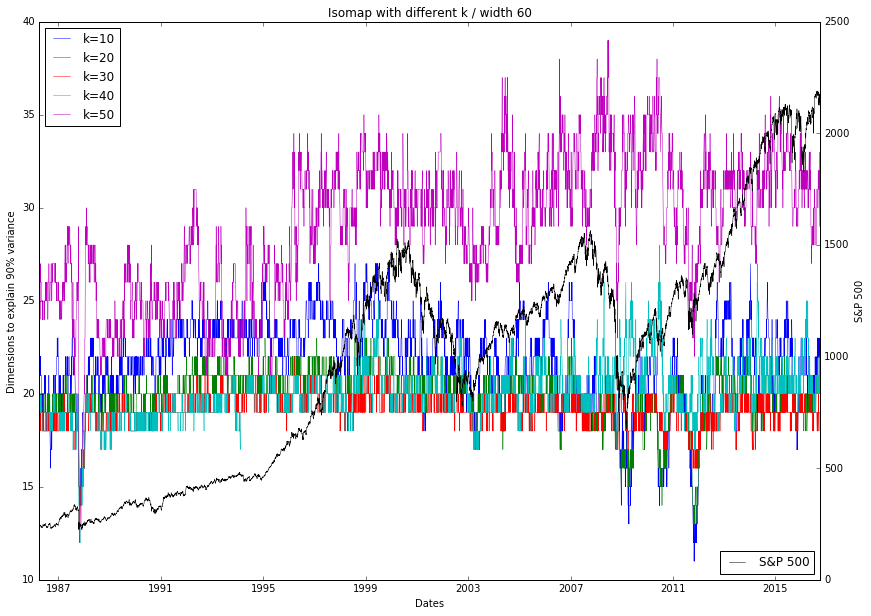

In [10]:
df = pd.read_csv('isomap_60.csv')

ts = pd.to_datetime(df['Dates'], format='%m/%d/%Y')

fig, ax1 = plt.subplots(figsize=(14,10))
ax2 = ax1.twinx()
l1 = ax1.plot(ts, df['ISO_EIG_DIM_K10'], 'b', label='k=10', linewidth=0.5)
l2 = ax1.plot(ts, df['ISO_EIG_DIM_K20'], 'g', label='k=20', linewidth=0.5)
l3 = ax1.plot(ts, df['ISO_EIG_DIM_K30'], 'r', label='k=30', linewidth=0.5)
l4 = ax1.plot(ts, df['ISO_EIG_DIM_K40'], 'c', label='k=40', linewidth=0.5)
l5 = ax1.plot(ts, df['ISO_EIG_DIM_K50'], 'm', label='k=50', linewidth=0.5)
ax1.legend(loc='upper left')

l6 = ax2.plot(ts, df['SP500'], 'k', label='S&P 500', linewidth=0.5)
ax2.legend(loc='lower right')

ax1.set_xlabel('Dates')
ax1.set_ylabel('Dimensions to explain 90% variance')
ax2.set_ylabel('S&P 500')

title = 'Isomap with different k / width 60'
plt.title(title)

# plt.savefig('all3.pdf')
plt.show()

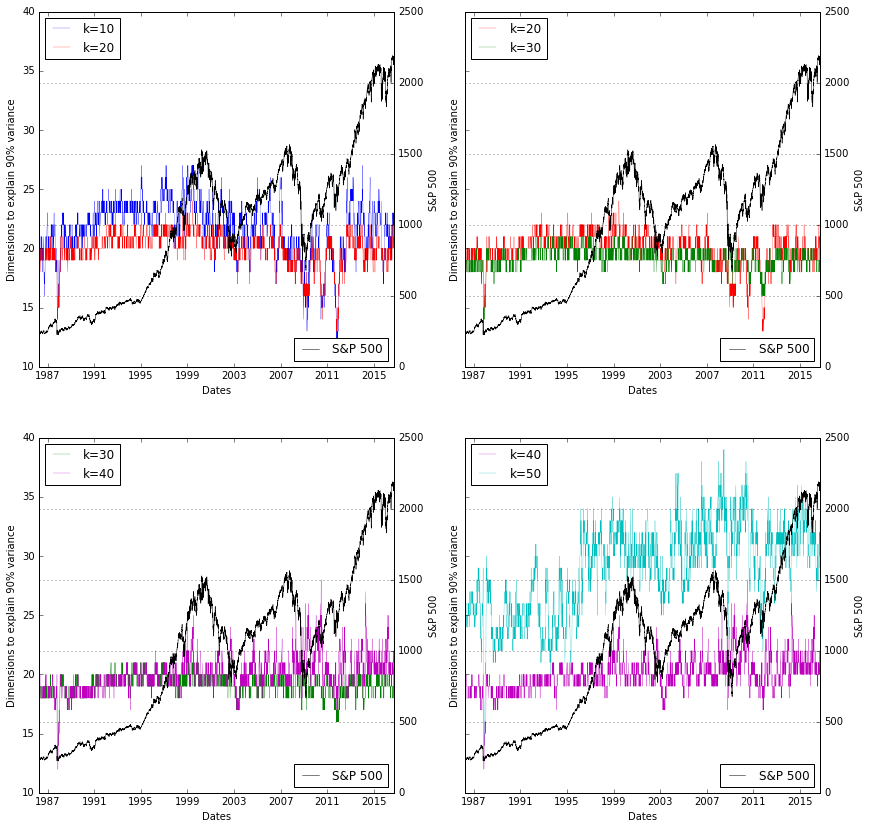

In [26]:
# plot with various axes scales
# plt.figure(1)
f, axarr = plt.subplots(2, 2, figsize=(14,14), sharey=True)

ax1 = axarr[0,0]
ax2 = axarr[0,1]
ax3 = axarr[1,0]
ax4 = axarr[1,1]

# linear
ax12 = ax1.twinx()
l1 = ax1.plot(ts, df['ISO_EIG_DIM_K10'], 'b', label='k=10', linewidth=0.25)
l2 = ax1.plot(ts, df['ISO_EIG_DIM_K20'], 'r', label='k=20', linewidth=0.25)
l6 = ax12.plot(ts, df['SP500'], 'k', label='S&P 500', linewidth=0.5)
ax1.legend(loc='upper left')
ax12.legend(loc='lower right')
ax1.set_xlabel('Dates')
ax1.set_ylabel('Dimensions to explain 90% variance')
ax12.set_ylabel('S&P 500')
plt.grid(True)


# log
ax22 = ax2.twinx()
l1 = ax2.plot(ts, df['ISO_EIG_DIM_K20'], 'r', label='k=20', linewidth=0.25)
l2 = ax2.plot(ts, df['ISO_EIG_DIM_K30'], 'g', label='k=30', linewidth=0.25)
l6 = ax22.plot(ts, df['SP500'], 'k', label='S&P 500', linewidth=0.5)
ax2.legend(loc='upper left')
ax22.legend(loc='lower right')
ax2.set_xlabel('Dates')
ax2.set_ylabel('Dimensions to explain 90% variance')
ax22.set_ylabel('S&P 500')
plt.grid(True)

ax32 = ax3.twinx()
l1 = ax3.plot(ts, df['ISO_EIG_DIM_K30'], 'g', label='k=30', linewidth=0.25)
l2 = ax3.plot(ts, df['ISO_EIG_DIM_K40'], 'm', label='k=40', linewidth=0.25)
l6 = ax32.plot(ts, df['SP500'], 'k', label='S&P 500', linewidth=0.5)
ax3.legend(loc='upper left')
ax32.legend(loc='lower right')
ax3.set_xlabel('Dates')
ax3.set_ylabel('Dimensions to explain 90% variance')
ax32.set_ylabel('S&P 500')
plt.grid(True)

ax42 = ax4.twinx()
l1 = ax4.plot(ts, df['ISO_EIG_DIM_K40'], 'm', label='k=40', linewidth=0.25)
l2 = ax4.plot(ts, df['ISO_EIG_DIM_K50'], 'c', label='k=50', linewidth=0.25)
l6 = ax42.plot(ts, df['SP500'], 'k', label='S&P 500', linewidth=0.5)
ax4.legend(loc='upper left')
ax42.legend(loc='lower right')
ax4.set_xlabel('Dates')
ax4.set_ylabel('Dimensions to explain 90% variance')
ax42.set_ylabel('S&P 500')
plt.grid(True)

# # symmetric log
# fig, ax1 = plt.subplot(223)
# ax2 = ax1.twinx()
# l1 = ax1.plot(ts, df['ISO_EIG_DIM_K30'], 'b', label='k=10', linewidth=0.5)
# l6 = ax2.plot(ts, df['SP500'], 'k', label='S&P 500', linewidth=0.5)
# ax1.legend(loc='upper left')
# ax2.legend(loc='lower right')
# ax1.set_xlabel('Dates')
# ax1.set_ylabel('Dimensions to explain 90% variance')
# ax2.set_ylabel('S&P 500')
# plt.grid(True)

# # logit
# fig, ax1 = plt.subplot(224)
# ax2 = ax1.twinx()
# l1 = ax1.plot(ts, df['ISO_EIG_DIM_K40'], 'b', label='k=10', linewidth=0.5)
# l6 = ax2.plot(ts, df['SP500'], 'k', label='S&P 500', linewidth=0.5)
# ax1.legend(loc='upper left')
# ax2.legend(loc='lower right')
# ax1.set_xlabel('Dates')
# ax1.set_ylabel('Dimensions to explain 90% variance')
# ax2.set_ylabel('S&P 500')
# plt.grid(True)

plt.show()

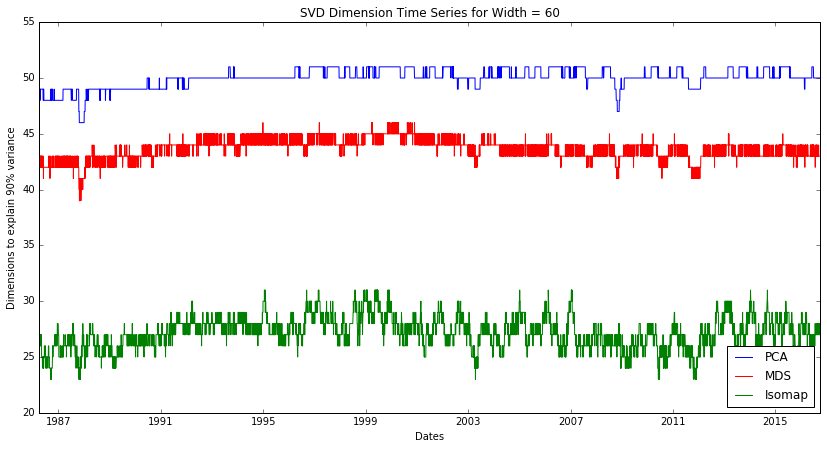

In [187]:
plt.figure(figsize=(14,7))
ts = pd.to_datetime(df_dim_ts['Dates'], format='%m/%d/%Y')

plt.plot(ts, df_dim_ts['PCA_SVD_DIMS'], 'b', label='PCA')
plt.plot(ts, df_dim_ts['MDS_SVD_DIMS'], 'r', label='MDS')
plt.plot(ts, df_dim_ts['ISO_SVD_DIMS'], 'g', label='Isomap')

title = 'SVD Dimension Time Series for Width = ' + str(width)

plt.title(title)
plt.xlabel('Dates')
plt.ylabel('Dimensions to explain 90% variance')
plt.legend(loc='lower right')
# plt.savefig('all3.pdf')
plt.show()

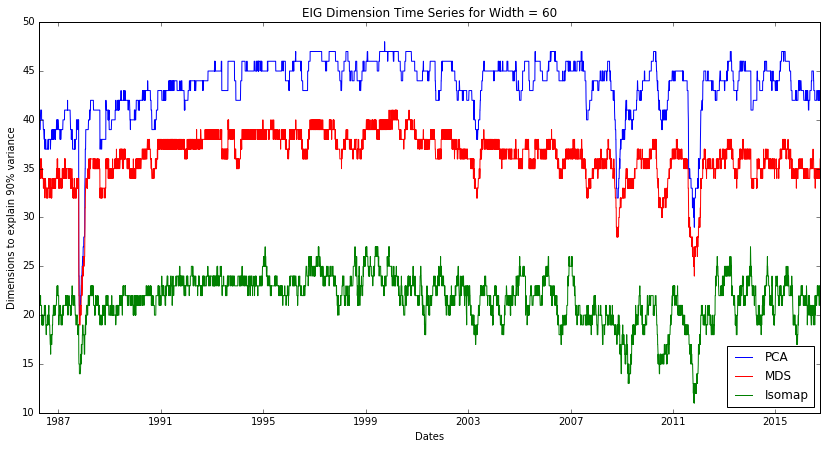

In [188]:
plt.figure(figsize=(14,7))
ts = pd.to_datetime(df_dim_ts['Dates'], format='%m/%d/%Y')

plt.plot(ts, df_dim_ts['PCA_EIG_DIMS'], 'b', label='PCA')
plt.plot(ts, df_dim_ts['MDS_EIG_DIMS'], 'r', label='MDS')
plt.plot(ts, df_dim_ts['ISO_EIG_DIMS'], 'g', label='Isomap')

title = 'EIG Dimension Time Series for Width = ' + str(width)

plt.title(title)
plt.xlabel('Dates')
plt.ylabel('Dimensions to explain 90% variance')
plt.legend(loc='lower right')
# plt.savefig('all3.pdf')
plt.show()

### Random utility functions that all dimensionality reduction methods use

In [50]:
import random

def get_random_indexes(n, n_max):
    """ The function randomly selects how many tickers to use
        n     - the first n random indexes that will be used for picking random tickers
        n_max - max number of tickers; this varies based on date; 
        
        While we are using Russell3000 index we do not care about the changing index constituents.
        So the list of tickers that exist today is a super set of the one that existed in 1986, 20 years ago. """
    nums = [x for x in range(n_max)]
    random.shuffle(nums)
    return nums[0:n]

def get_starting_index(max_rows):
    """ We need to start at some random date
        max_rows - max number of rows we have return data for 
        The value of 1000 is arbitrary.  If we were to only use last 30 days we will not get any time series."""
    return random.randint(0, max_rows - 1000)

def cols_with_not_nan(df):
    row = df.loc[df.index[0]]
    cols = df_temp.columns[pd.notnull(row)]
    return len(cols)

def get_dimension(exp_var, threshold=0.9):
    for i in range(0, exp_var.shape[0]):        
        if exp_var[i] >= threshold:
            return i
    return exp_var.shape[0]

In [51]:
import os.path

def log(i, df):
    save_path = 'C:\\workspace\\nldr\\log'
    name_of_file = str(i) + '.csv'
    file_name = os.path.join(save_path, name_of_file)
    df.to_csv(file_name)

## Comparing Python MDS to Custom MDS

In [56]:
from sklearn import manifold
from numpy.linalg import svd
from scipy.spatial.distance import pdist
from numpy.linalg import norm
import numpy as np

In [57]:
def get_distance_matrix(df):
    rows = len(df)
    distance = np.zeros((rows, rows))    
    for i, rowi in df.iterrows():
        for j, rowj in df.iterrows():
            distance[i,j] = norm(rowi - rowj)            
    return distance

In [58]:
import numpy as np

class ChenMDS(object):

    def __init__(self):
        self.D = None
        self.target_d = None

    def fit(self, D):
        '''
        :param D: Distance matrix
        :return: None
        '''
        # Distances are squared
        self.D = np.array(D)**2
        # Double centerization
        s = -0.5*(self.D-np.mean(self.D, 0)-np.mean(self.D, 1).reshape((-1,1))+np.mean(self.D))
        evals, evecs = np.linalg.eigh(s)
        idx = np.argsort(np.abs(evals))[::-1]
        self.evals, self.evecs = evals[idx], evecs[:,idx]
        self.n = len(self.D)
        return self.evals, self.evecs

    def transform(self, p):
        '''
        :param p: Target number of dimensionality
        :return: Configuration matrix. Each raw is a transformed observation.
        '''
#        evals_sqrt = np.sqrt(self.evals)
        return self.evecs[:,:p].dot(np.diag(np.sqrt(self.evals[:p])))

In [195]:
def compare_python_mds_2_custom_mds(df):
    max_rows = df.shape[0] - (width + 1)    
    dates = []
    python_dimensions = []
    custom_dimensions = []
    threshold = 0.9
    chenMDS = ChenMDS()
    
    for i in range(0, max_rows):
        data = df[i:i+width].copy()
        ds = df.index[i+width]
        
        orig_cols_len = len(data.columns)
        data.dropna(axis=1, inplace=True)
        new_cols_len = len(data.columns)
        
        save_index = data.index
        data.index = list(range(0, len(data)))
        D = get_distance_matrix(data)
        data.index = save_index

        # ---------------------------------------------------------
        # Custom MDS
        # ---------------------------------------------------------        
#         eigen_vals, eigen_vecs = chenMDS.fit(D)
#         tot = sum(eigen_vals)
#         var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
#         cum_var_exp = np.cumsum(var_exp)
#         custom_dim = get_dimension(cum_var_exp, threshold)
#         custom_dimensions.append(custom_dim)
        chenMDS.fit(D)
        Y = chenMDS.transform(width)
        Y = Y[:,~np.all(np.isnan(Y), axis=0)]
        U, S, V = np.linalg.svd(Y)
        custom_dim = get_eig_dimension(S, threshold)
        custom_dimensions.append(custom_dim)

        # ---------------------------------------------------------
        # Python MDS
        # ---------------------------------------------------------
        Y = manifold.MDS(n_components=width, max_iter=300, n_init=4).fit_transform(data)
        Y = Y[:,~np.all(np.isnan(Y), axis=0)]
        U, S, V = np.linalg.svd(Y)
        py_dim = get_eig_dimension(S, threshold)
        python_dimensions.append(py_dim)
        
        dates.append(ds)
        
        if i % 100 == 0:
            print('%s' % ds)
                
    df1 = pd.DataFrame()
    df1['Dates'] = dates
    df1['Custom_MDS'] = custom_dimensions
    df1['Python_MDS'] = python_dimensions
    return df1

<font color="red">I am only using eigen values because ChenMDS is using eigen values.</font>

In [196]:
df_py_custom_mds = compare_python_mds_2_custom_mds(df)

4/1/1986
8/21/1986
1/14/1987
6/8/1987
10/28/1987
3/22/1988
8/12/1988
1/5/1989
5/30/1989
10/19/1989
3/14/1990
8/6/1990
12/27/1990
5/21/1991
10/11/1991
3/5/1992
7/28/1992
12/17/1992
5/12/1993
10/4/1993
2/24/1994
7/20/1994
12/9/1994
5/4/1995
9/26/1995
2/16/1996
7/11/1996
12/2/1996
4/25/1997
9/17/1997
2/10/1998
7/6/1998
11/24/1998
4/21/1999
9/13/1999
2/3/2000
6/27/2000
11/16/2000
4/12/2001
9/5/2001
2/4/2002
6/27/2002
11/18/2002
4/14/2003
9/5/2003
1/29/2004
6/23/2004
11/12/2004
4/8/2005
8/30/2005
1/24/2006
6/16/2006
11/7/2006
4/4/2007
8/27/2007
1/18/2008
6/12/2008
11/3/2008
3/30/2009
8/20/2009
1/13/2010
6/8/2010
10/28/2010
3/23/2011
8/15/2011
1/6/2012
5/31/2012
10/22/2012
3/20/2013
8/12/2013
1/3/2014
5/29/2014
10/20/2014
3/16/2015
8/6/2015
12/29/2015
5/23/2016


### Plot comparing Python MDS to Custom MDS

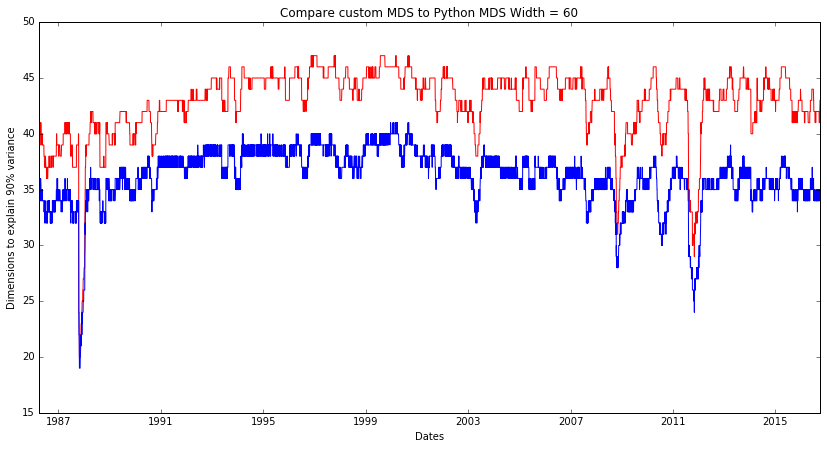

In [197]:
mds_time = pd.to_datetime(df_py_custom_mds['Dates'], format='%m/%d/%Y')
plt.figure(figsize=(14,7))
plt.plot(mds_time, df_py_custom_mds['Custom_MDS'], 'r')
plt.plot(mds_time, df_py_custom_mds['Python_MDS'], 'b')
title = 'Compare custom MDS to Python MDS Width = ' + str(width)
plt.title(title)
plt.xlabel('Dates')
plt.ylabel('Dimensions to explain 90% variance')

# Isomap 

In [198]:
import math

def list_components(adj):
    # Now rows may be duplicate, create g x n matrix where g is number
    # of unique groups and n is number of sensors
    groups = {}

    for row in adj:
        groups[str(row)] = row

    return [np.nonzero(row)[0] for row in groups.values()]

def flatidx(idx):
    adds = np.arange(0, len(idx) ** 2, len(idx))
    return np.ravel(np.transpose(idx) + adds)

def slice_matrix(m,i,j):
    """
    i is an array of row indices
    j is an array of column indices
    m is a matrix where we want to slice out rows i and cols j
    """
    return np.take(np.take(m,i,0),j,1)


def cluster_graph(d, size = 7, graph = 'adjacency'):
    """
    An essential part of isomap is the construction of a graph. We
    can use this graph for other kinds of structural analysis.
    """

    ld = d.copy()

    # sort to find initial k clusters
    idx = np.argsort(ld)

    # transform row indices for square d to row indices for flat d
    np.put(ld, flatidx(idx[:,size:]), math.inf)

    # ensure that the result is symmetric
    ld = np.minimum(ld, np.transpose(ld))

    if graph == 'adjacency':
        return np.less(ld, math.inf) # boolean matrix. use astype(int) for 0-1 matrix.
    elif graph == 'distance':
        """ Return the shortest paths. """
        return shortest_paths(ld)
    else:
        raise(ValueError, "Unknown graph type!")

def shortest_paths(adj):
    (n,m) = adj.shape
    for k in range(n):
        adj = np.minimum( adj, np.add.outer(adj[:,k],adj[k,:]) )
    return adj

        
def isomap(estimator, d, size = 10):
    """ Compute isomap instead of mds. Currently neighborhoods of type k are supported. """
    if not len(d.shape) == 2:
        raise ValueError("d must be a square matrix")      
              
    # the put operation is destructive to d
    ld = cluster_graph(d, size = size, graph = 'distance')
    
    adj = cluster_graph(d, size = size, graph = 'adjacency')

    # shortest paths will find connected components
    tmp = np.less(ld, math.inf) # 0-1
    groups = list_components(tmp)

    # now do classical mds on largest connected component
    groups.sort(key=lambda x: len(x), reverse=True)

    dg = slice_matrix(ld, groups[0], groups[0])

    eigen_vals, eigen_vecs = estimator.fit(dg)
    
#     Y,eigs, U, V = mds(dg, dimensions)

    return (eigen_vals, eigen_vecs)



def compare_python_isomap_2_custom_isomap(df):
    max_rows = df.shape[0] - (width + 1)    
    dates = []
    python_dimensions = []
    custom_dimensions = []
    threshold = 0.9
    chenMDS = ChenMDS()
    
    for i in range(0, max_rows):
        data = df[i:i+width].copy()
        ds = df.index[i+width]
        
        orig_cols_len = len(data.columns)
        data.dropna(axis=1, inplace=True)
        new_cols_len = len(data.columns)
        
        save_index = data.index
        data.index = list(range(0, len(data)))
        D = get_distance_matrix(data)
        data.index = save_index

        # ---------------------------------------------------------
        # Custom Isomap
        # ---------------------------------------------------------        
        eigen_vals, eigen_vecs = isomap(chenMDS, D, size=30)
        tot = sum(eigen_vals)
        var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
        cum_var_exp = np.cumsum(var_exp)
        custom_dim = get_dimension(cum_var_exp, 0.9)
        custom_dimensions.append(custom_dim)

        # ---------------------------------------------------------
        # Python Isomap
        # ---------------------------------------------------------
        Y = manifold.Isomap(n_neighbors=30, n_components=width).fit_transform(data)
        Y = Y[:,~np.all(np.isnan(Y), axis=0)]
        U, S, V = np.linalg.svd(Y)
        py_dim = get_eig_dimension(S, threshold)
        python_dimensions.append(py_dim)
        
        dates.append(ds)
        
        if i % 100 == 0:
            print('%s' % ds)
                
    df1 = pd.DataFrame()
    df1['Dates'] = dates
    df1['Custom_Isomap'] = custom_dimensions
    df1['Python_Isomap'] = python_dimensions
    return df1


#--------------------------------------------------------------------------
# Use Isomap to calculate moving window
def calc_isomap_ts(df):
    max_rows = df.shape[0] - (width + 1)    
    dates = []
    dimensions = []
    chenMDS = ChenMDS()
    for i in range(0, max_rows):
        data = df[i:i+width].copy()
        
        orig_cols_len = len(data.columns)
        data.dropna(axis=1, inplace=True)
        new_cols_len = len(data.columns)
        
        save_index = data.index
        data.index = list(range(0, len(data)))
        D = get_distance_matrix(data)
        data.index = save_index
        
        eigen_vals, eigen_vecs = isomap(chenMDS, D, size=30)

        tot = sum(eigen_vals)
        var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
        cum_var_exp = np.cumsum(var_exp)
        dim = get_dimension(cum_var_exp, 0.9)

        dates.append(df.index[i+width])
        dimensions.append(dim)
        
    df1 = pd.DataFrame()
    df1['Dates'] = dates
    df1['Dimensions'] = dimensions
    return df1

4/1/1986
8/21/1986
1/14/1987
6/8/1987
10/28/1987
3/22/1988
8/12/1988
1/5/1989
5/30/1989
10/19/1989
3/14/1990
8/6/1990
12/27/1990
5/21/1991
10/11/1991
3/5/1992
7/28/1992
12/17/1992
5/12/1993
10/4/1993
2/24/1994
7/20/1994
12/9/1994
5/4/1995
9/26/1995
2/16/1996
7/11/1996
12/2/1996
4/25/1997
9/17/1997
2/10/1998
7/6/1998
11/24/1998
4/21/1999
9/13/1999
2/3/2000
6/27/2000
11/16/2000
4/12/2001
9/5/2001
2/4/2002
6/27/2002
11/18/2002
4/14/2003
9/5/2003
1/29/2004
6/23/2004
11/12/2004
4/8/2005
8/30/2005
1/24/2006
6/16/2006
11/7/2006
4/4/2007
8/27/2007
1/18/2008
6/12/2008
11/3/2008
3/30/2009
8/20/2009
1/13/2010
6/8/2010
10/28/2010
3/23/2011
8/15/2011
1/6/2012
5/31/2012
10/22/2012
3/20/2013
8/12/2013
1/3/2014
5/29/2014
10/20/2014
3/16/2015
8/6/2015
12/29/2015
5/23/2016


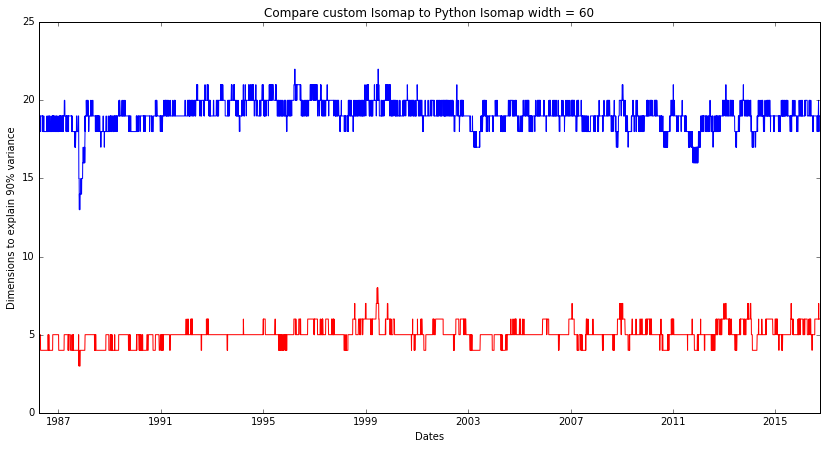

In [199]:
df_py_custom_isomap = compare_python_isomap_2_custom_isomap(df)
isomap_time = pd.to_datetime(df_py_custom_isomap['Dates'], format='%m/%d/%Y')
plt.figure(figsize=(14,7))
plt.plot(isomap_time, df_py_custom_isomap['Custom_Isomap'], 'r')
plt.plot(isomap_time, df_py_custom_isomap['Python_Isomap'], 'b')
title = 'Compare custom Isomap to Python Isomap width = ' + str(width)
plt.title(title)
plt.xlabel('Dates')
plt.ylabel('Dimensions to explain 90% variance')